<a href="https://colab.research.google.com/github/anjaleeDS/MLCS68/blob/master/01hwTelco_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
telco_data =  pd.read_csv('https://raw.githubusercontent.com/cjflanagan/cs68/master/Telco-Customer-Churn.csv')

In [3]:
telco_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
telco_data.Churn.value_counts()

No     3738
Yes    1332
Name: Churn, dtype: int64

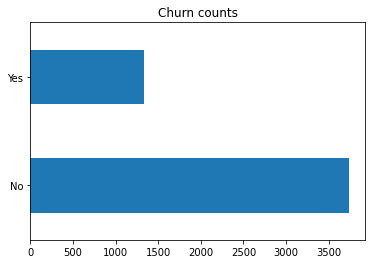

In [5]:
telco_data.Churn.value_counts().plot(kind='barh', title='Churn counts')
plt.show() 

In [6]:
telco_data.Churn = telco_data.Churn.replace({'Yes':1, 'No':0}) # Replacing 'Yes' and 'No' with numerical values

In [7]:
y = telco_data.pop('Churn') # Removing Churn field and storing it in variable y
X = telco_data[['SeniorCitizen', 'tenure']] # Creating a smaller subset of features

In [8]:
telco_data.PaymentMethod.value_counts()

Electronic check             1691
Mailed check                 1153
Bank transfer (automatic)    1116
Credit card (automatic)      1110
Name: PaymentMethod, dtype: int64

# Splitting data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [10]:
X_train.head()

,SeniorCitizen,tenure
2717,0,72
5034,1,48
3657,0,37
4892,1,20
720,0,2


# Fitting model

In [11]:
# fit a model
clf = LogisticRegression(penalty='l2').fit(X_train, y_train)
# predict probabilities
predictions = clf.predict_proba(X_test)[:, 1]

# Evaluating model

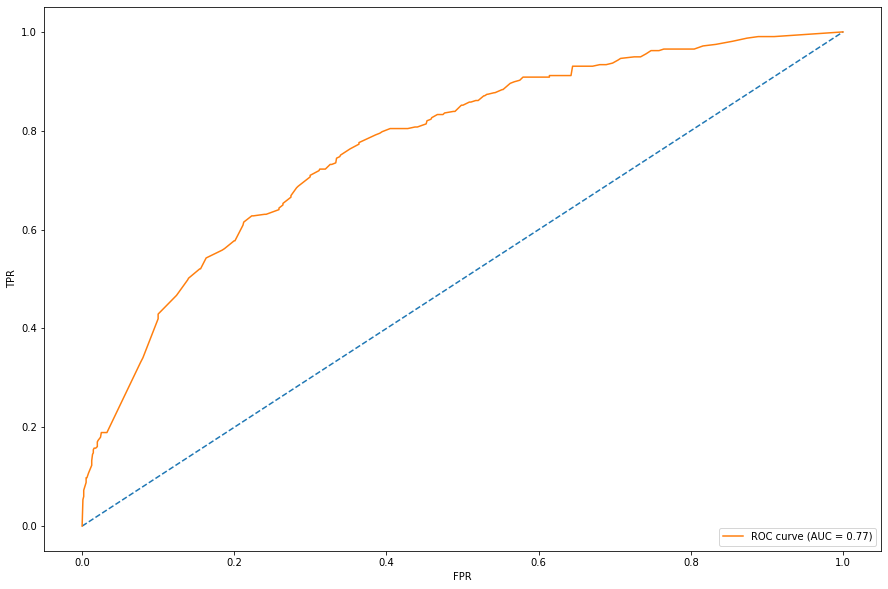

In [12]:
# calculate scores
auc = roc_auc_score(y_test, predictions)

# calculate roc curves
fpr, tpr, _ = roc_curve(y_test, predictions)

plt.figure(figsize=(15, 10))
# plot horizontal line 
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
# axis labels
plt.xlabel('FPR')
plt.ylabel('TPR')
# show the legend
plt.legend(loc='lower right')
# show the plot
plt.show()

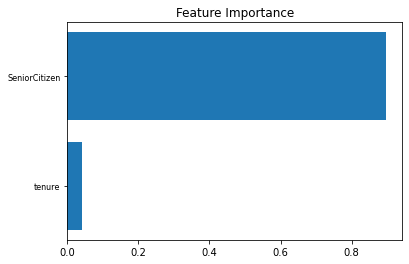

In [13]:
feature_importance = abs(clf.coef_[0])
# feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)

plt.title('Feature Importance')
plt.show()

#My tests

In [ ]:
telco_data.info()

In [141]:
# telco_data.TechSupport.isnull().any()
telco_data.OnlineSecurity.value_counts()

No                     2504
Yes                    1453
No internet service    1113
Name: OnlineSecurity, dtype: int64

## Categorical fields only: PaymentMethod, Multiple Lines, InternetService, Contract

###subset the data

In [177]:
X2 = telco_data[['PaymentMethod', 'MultipleLines', 'InternetService', 'Contract','OnlineSecurity','OnlineBackup']] # Creating a smaller subset of features
X2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5070 entries, 0 to 5069
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   PaymentMethod    5070 non-null   object
 1   MultipleLines    5070 non-null   object
 2   InternetService  5070 non-null   object
 3   Contract         5070 non-null   object
 4   OnlineSecurity   5070 non-null   object
 5   OnlineBackup     5070 non-null   object
dtypes: object(6)
memory usage: 237.8+ KB


###change the categorical columns and values into dummies

In [178]:
#dummify
dum_X2 = pd.get_dummies(data=X2, drop_first=True) 
dum_X2

,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes
0,0,1,0,1,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,1,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,1,0,1
3,0,0,0,1,0,0,0,1,0,0,1,0,0
4,0,1,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5065,0,0,0,0,1,0,1,1,0,1,0,1,0
5066,0,0,0,1,0,0,0,0,1,0,0,0,1
5067,0,0,0,0,0,0,0,0,0,0,1,0,0
5068,0,0,0,0,0,0,1,0,1,1,0,1,0


###make new x and y for training and test set

In [179]:
X2_train, X2_test, y_train, y_test = train_test_split(dum_X2, y, test_size = 0.25)

### fit and evaluate model

In [180]:
# fit a model
clf = LogisticRegression(penalty='l2').fit(X2_train, y_train)
# predict probabilities
predictions = clf.predict_proba(X2_test)[:, 1]

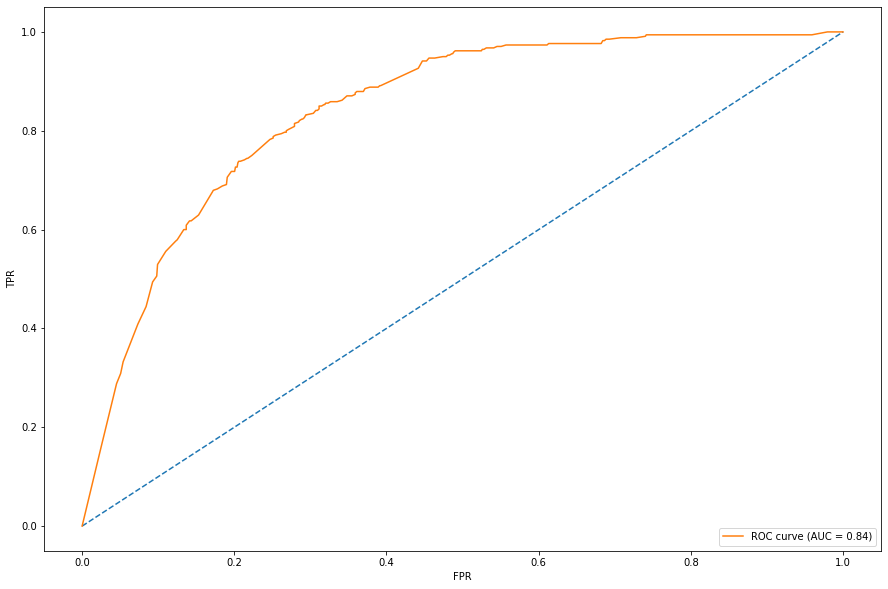

In [181]:
# evaluate

# calculate scores
auc = roc_auc_score(y_test, predictions)

# calculate roc curves
fpr, tpr, _ = roc_curve(y_test, predictions)

plt.figure(figsize=(15, 10))
# plot horizontal line 
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
# axis labels
plt.xlabel('FPR')
plt.ylabel('TPR')
# show the legend
plt.legend(loc='lower right')
# show the plot
plt.show()

In [182]:
# sorted_idx.shape[0]
X2.columns

Index(['PaymentMethod', 'MultipleLines', 'InternetService', 'Contract',
       'OnlineSecurity', 'OnlineBackup'],
      dtype='object')

###feature importance

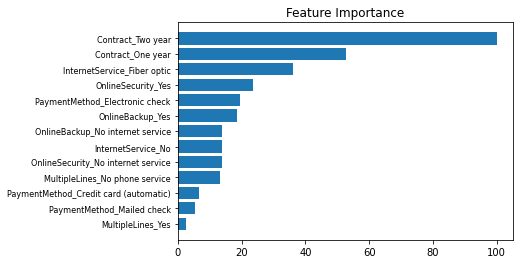

In [183]:
feature_importance = abs(clf.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X2_test.columns)[sorted_idx], fontsize=8)

plt.title('Feature Importance')
plt.show()

###correlation matrix

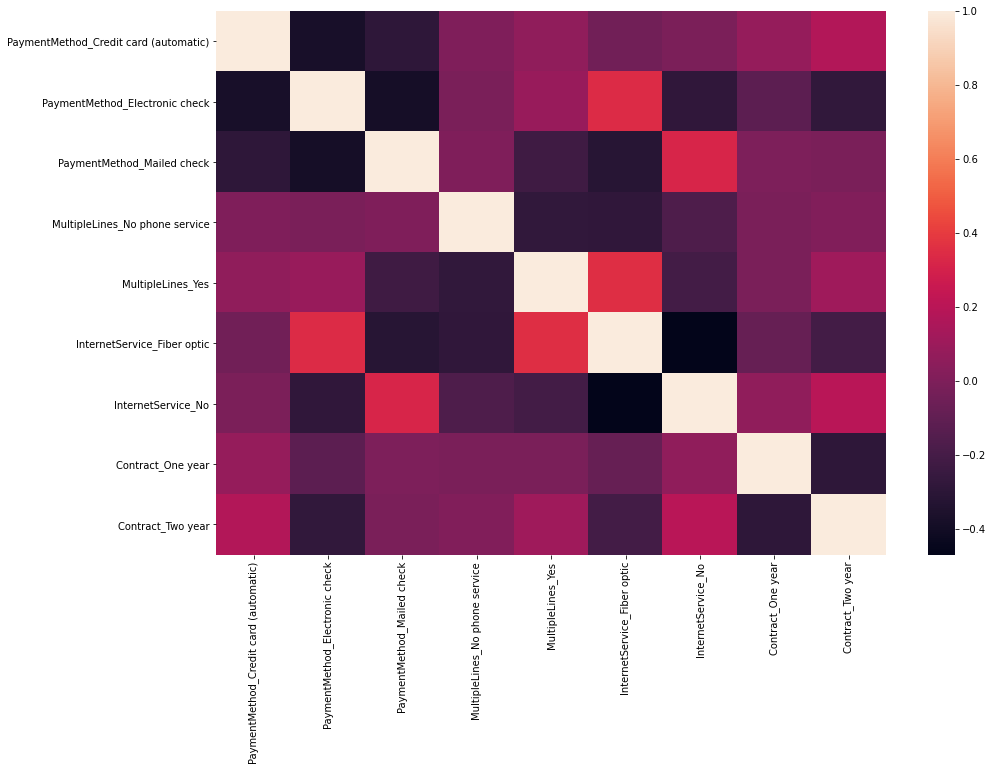

In [24]:
corr_matrix = dum_X2.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix)
plt.show()

## Numerical Values: MonthlyCharges, TotalCharges, tenure


###subset and scale

In [189]:
num_var_cols = ['MonthlyCharges', 'TotalCharges','tenure']
x3 = telco_data[num_var_cols]

x3.TotalCharges = x3.TotalCharges.convert_dtypes()
x3['TotalCharges'] = pd.to_numeric(x3['TotalCharges'], errors='coerce')
x3 = x3.fillna(0)
# x3.isnull().sum()

#scale it!
std = StandardScaler()
scaled_x3 = std.fit_transform(x3)
scaled_x3 = pd.DataFrame(scaled, columns=num_var_cols)


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [191]:
num_var_cols

['MonthlyCharges', 'TotalCharges', 'tenure']

###split and fit!

In [193]:
#split
x3_train, x3_test, y_train, y_test = train_test_split(scaled_x3, y, test_size = 0.25)

#fit
clf = LogisticRegression(penalty='l2').fit(x3_train, y_train)
#predict probabilities
predict_x3 = clf.predict_proba(x3_test)[:,1]

In [63]:
predict_x3

array([0.00656921, 0.53310768, 0.05548002, ..., 0.01177597, 0.70145271,
       0.05313137])

### evaluating model and get AUC

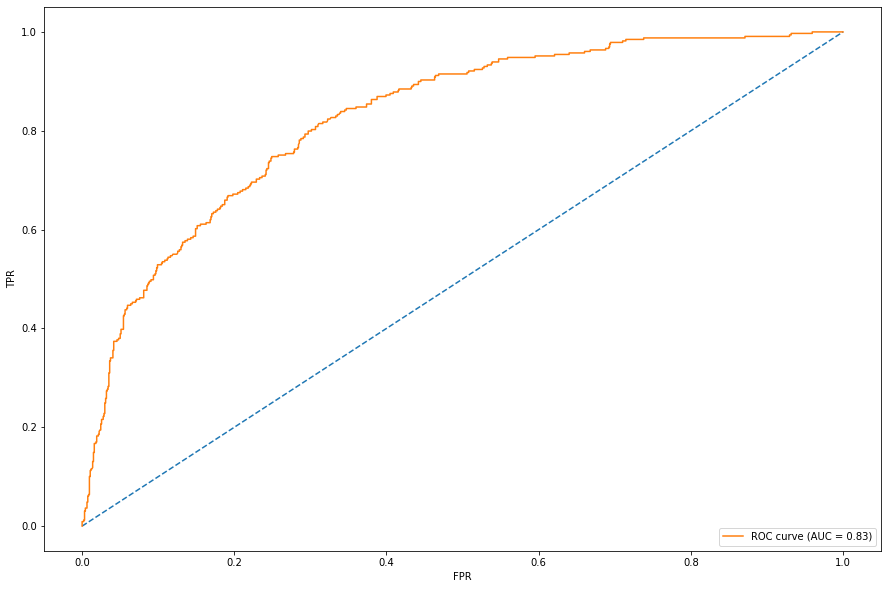

In [194]:
# calculate scores
auc = roc_auc_score(y_test, predict_x3)

# calculate roc curves
fpr, tpr, _ = roc_curve(y_test, predict_x3)

plt.figure(figsize=(15, 10))
# plot horizontal line 
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
# axis labels
plt.xlabel('FPR')
plt.ylabel('TPR')
# show the legend
plt.legend(loc='lower right')
# show the plot
plt.show()

###feature importance

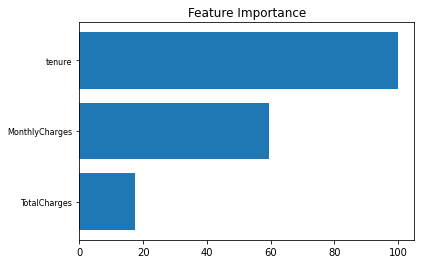

In [195]:
feature_importance = abs(clf.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(scaled_x3.columns)[sorted_idx], fontsize=8)

plt.title('Feature Importance')
plt.show()

## Mixed Vars: tenure, MonthlyCharges, Contract, InternetService, Dependents, OnlineSecurity, OnlineBackup

took the top features of numerical and categorical

In [ ]:
### deal with num_cols
num_var_cols = ['MonthlyCharges', 'tenure']
numX = telco_data[num_var_cols]
#scale it!
std = StandardScaler()
scaled_numX = std.fit_transform(numX)
scaled_numX = pd.DataFrame(scaled, columns=num_var_cols)

### deal with cat_cols
catX = telco_data[['PaymentMethod', 'MultipleLines', 'InternetService', 
                   'Contract','OnlineSecurity','OnlineBackup']]

#dummy it!
dummy_catX = pd.get_dummies(data=catX, drop_first=True)

# combine num & cats
comboX = pd.concat([dummy_catX, scaled_numX], join='outer', axis=1)
comboX


### split data

In [235]:
comboX_train, comboX_test, y_train, y_test = train_test_split(comboX, y, test_size=0.25)

### fit & eval model

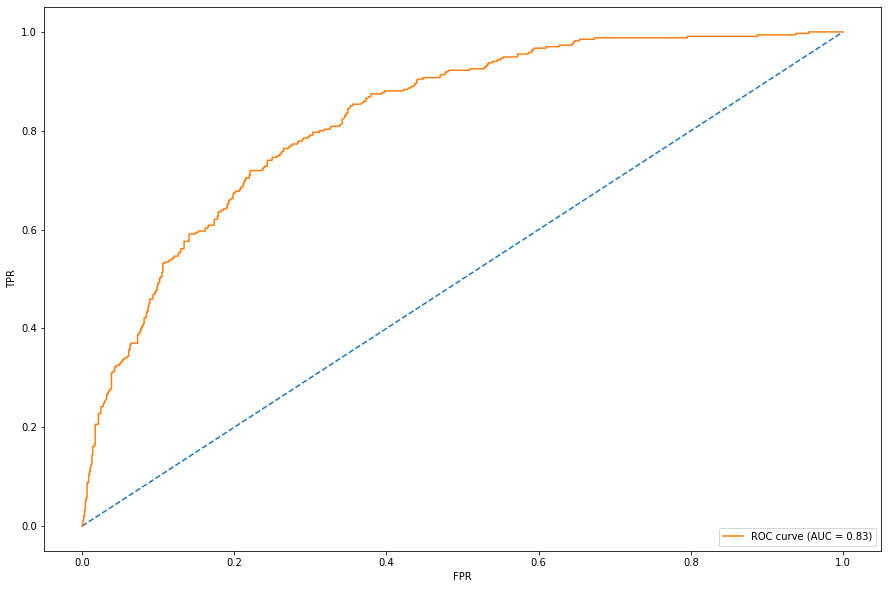

In [232]:
# fit a model
clf = LogisticRegression(penalty='l2').fit(comboX_train, y_train)
# predict probabilities
combo_predictions = clf.predict_proba(comboX_test)[:, 1]

# calculate scores
auc = roc_auc_score(y_test, combo_predictions)

# calculate roc curves
fpr, tpr, _ = roc_curve(y_test, combo_predictions)

plt.figure(figsize=(15, 10))
# plot horizontal line 
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
# axis labels
plt.xlabel('FPR')
plt.ylabel('TPR')
# show the legend
plt.legend(loc='lower right')
# show the plot
plt.show()

###feature importance

In [230]:
feature_importance

array([0.16551347, 0.44866041, 0.01785057, 0.88640556, 0.3560853 ,
       0.56237406, 0.12239418, 0.69480493, 1.55949818, 0.12239418,
       0.50988153, 0.12239418, 0.20693145, 0.54281672, 0.86970115])

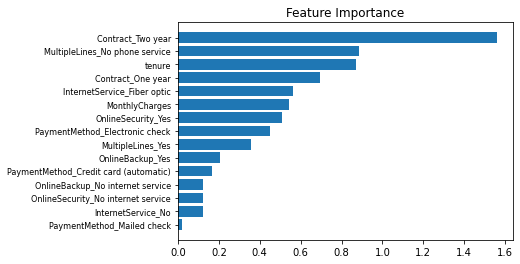

In [222]:
feature_importance = abs(clf.coef_[0])
# feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(comboX.columns)[sorted_idx], fontsize=8)

plt.title('Feature Importance')
plt.show()

## My functions

In [16]:

ajdklf;jsd
def get_dependent_vars(df,var_list):
  
  dep_df = df[var_list] #subset it

  # separate object-types into categorical vars and binary vars
  cat_cols = dep_df.columns[dep_df.dtypes == 'object'].tolist()
  
  bin_cat_cols = dep_df.columns[dep_df.columns.nunique() == 2].tolist() 
  multi_cat_cols = dep_df.columns[dep_df.columns.nunique() > 2].tolist()
  
  # LabelEncoder() bin_cat_cols
  # for column in bin_cat_cols :
  #   dep_df[column] = LabelEncoder().fit_transform(df[column])  

  dddf = pd.get_dummies(data = dep_df, drop_first=True)
  print(dddf)

  # print(dep_df.info())

  return dddf

get_dependent_vars(telco_data, ['PaymentMethod', 'MultipleLines', 'InternetService', 'Contract'])

NameError: ignored

### PaymentMethod, Multiple Lines, InternetService, Contract

In [ ]:
# copy telco_data for safety
master_telco_data = telco_data

# drop customerID
telco_data.drop(columns='customerID', inplace=True)

# make TotalCharges into float64
telco_data.TotalCharges = telco_data.TotalCharges.convert_dtypes() #make into string
telco_data['TotalCharges'] = pd.to_numeric(telco_data['TotalCharges'], errors='coerce') #make into float

#0. get numerical columns
numerical_cols = telco_data.columns[telco_data.dtypes=='int64'].tolist()


#1. get all columns that are non-numeric
categorical_cols = telco_data.columns[telco_data.dtypes=='object'].tolist()

#2. get all columns that are binary and change WITHIN the original dataframe and
# them using LabelEncoder (incremental coding) because order does not matter
binary_columns = telco_data[categorical_cols].nunique()[telco_data[categorical_cols].nunique() == 2].index.tolist()

  # Transform binary_columns
for column in binary_columns:
  telco_data[column] = LabelEncoder().fit_transform(telco_data[column])

#3. get all columns that are non-binary and change them using pd.get_dummies 
multi_valued_cols = telco_data[categorical_cols].nunique()[telco_data[categorical_cols].nunique() > 2].index.tolist()
dummies_adjusted_data = pd.get_dummies(data=telco_data, columns=multi_valued_cols, drop_first=True )

#4. combine the dummy data and now, encoded binary columns together


In [ ]:
# Scaling Numerical columns

my_std = StandardScaler()
scaled = my_std.fit_transform(dummies_adjusted_data[numerical_cols])
scaled = pd.DataFrame(scaled, columns=numerical_cols)
scaled

In [ ]:
#integrate scaled into dummies prepped matrix and take out the old ones
dummies_adjusted_data = dummies_adjusted_data.copy()

data = dummies_adjusted_data.drop(columns = numerical_cols,axis = 1)
data = data.merge(scaled,left_index=True,right_index=True,how = "left")
data

In [ ]:
telco_data['SeniorCitizen']

In [ ]:
#make new df
x1 = data
x1 = x1.fillna(0)

#make into a def!!!
# x1.isnull().any() #BOOLEAN tells which column has the null/nan
# x1.TotalCharges = x1.TotalCharges.fillna(0)
# x1.isnull().sum() #COUNT tells which column has the null/nan

#split data
x1_train, x1_test, y_train, y_test = train_test_split(x1, y, test_size = 0.25)
x1_train.head()


In [ ]:
x1_train.isnull().any()

In [ ]:
#fit model
my_clf = LogisticRegression().fit(x1_train,y_train)
#predict probabilities
my_predictions = my_clf.predict_proba(x1_test)[:,1]